# LeR rate calculation with ANN SNR

* When inner product SNR from `gwsnr` package is the most accurate, but it is time consuming.

* Instead, we would use the ANN SNR in `gwsnr` and test it's accuracy. 

In [1]:
# call the LeR class
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR

In [2]:
# gwsnr ann model depends on the partial scaling method, and this will be generated if not already present.
ler = LeR(npool=4,
          verbose=False,
          snr_type='ann',
          waveform_approximant='IMRPhenomXPHM',
          ifos = ['L1', 'H1'],
            )

## Here are some clarification to make regarding the capability of the ANN SNR in `gwsnr` package:

* ANN SNR was trained with more data near SNR threshold of 8, for net optimal SNR

* ANN is more accurate in predicting whether the SNR is above or below 8, rather than the exact value of SNR

In [3]:
mass_1 = np.array([5, 10.,50.,100.])
ratio = np.array([1, 0.8,0.5,0.2])
luminosity_distance = 1200.
ann_snr = ler.snr(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=luminosity_distance)["optimal_snr_net"]
bilby_snr = ler.snr_bilby(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=luminosity_distance)["optimal_snr_net"]

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]


In [4]:
print("SNR comparison: bilby vs ann")
print(np.concatenate((bilby_snr.reshape(len(bilby_snr),1), ann_snr.reshape(len(ann_snr),1)),1))

SNR comparison: bilby vs ann
[[ 7.35190521  6.56832296]
 [11.56231852 10.52764327]
 [31.53939166 31.53002685]
 [27.15509832 32.32490191]]


In [5]:
# calculate pdet instead of absolute optimal snr
ann_snr = np.array(ann_snr>8, dtype=int)
bilby_snr = np.array(bilby_snr>8, dtype=int)
print("Pdet comparison: bilby vs ann")
print(np.concatenate((bilby_snr.reshape(len(bilby_snr),1), ann_snr.reshape(len(ann_snr),1)),1))

Pdet comparison: bilby vs ann
[[0 0]
 [1 1]
 [1 1]
 [1 1]]


## Let's check the acccuracy of in rate calculation

### With ANN

In [3]:
ler.selecting_n_unlensed_detectable_events(
    size = 500,
    batch_size=10000,
    snr_threshold=8,
    resume=False,
    output_jsonfile='n_unlensed_detectable_events_ann.json',
    meta_data_file='meta_unlensed_ann.json',
    trim_to_size=False,
);

collected number of detectable events =  0
collected number of detectable events =  37
total number of events =  10000
total unlensed rate (yr^-1): 383.0347173164801
collected number of detectable events =  69
total number of events =  20000
total unlensed rate (yr^-1): 357.1539931734747
collected number of detectable events =  104
total number of events =  30000
total unlensed rate (yr^-1): 358.8793747830084
collected number of detectable events =  135
total number of events =  40000
total unlensed rate (yr^-1): 349.3897759305731
collected number of detectable events =  163
total number of events =  50000
total unlensed rate (yr^-1): 337.48464282479057
collected number of detectable events =  190
total number of events =  60000
total unlensed rate (yr^-1): 327.82250581140187
collected number of detectable events =  221
total number of events =  70000
total unlensed rate (yr^-1): 326.83657346309695
collected number of detectable events =  256
total number of events =  80000
total unlen

### With inner product

In [4]:
ler = LeR(npool=4,
          verbose=False,
          snr_type='inner_product',
          waveform_approximant='IMRPhenomXPHM',
          ifos = ['L1', 'H1'],
            )

In [5]:
ler.selecting_n_unlensed_detectable_events(
    size = 500,
    batch_size=10000,
    snr_threshold=8,
    resume=False,
    output_jsonfile='n_unlensed_detectable_events_inner_product.json',
    meta_data_file='meta_unlensed_inner_product.json',
    trim_to_size=False,
);

collected number of detectable events =  0


  0%|                                                                      | 0/9284 [00:00<?, ?it/s]

collected number of detectable events =  39
total number of events =  10000
total unlensed rate (yr^-1): 403.73929663088444


  0%|                                                                      | 0/9236 [00:00<?, ?it/s]

collected number of detectable events =  76
total number of events =  20000
total unlensed rate (yr^-1): 393.3870069736823


  0%|                                                                      | 0/9207 [00:00<?, ?it/s]

collected number of detectable events =  113
total number of events =  30000
total unlensed rate (yr^-1): 389.9362437546149


  0%|                                                                      | 0/9294 [00:00<?, ?it/s]

collected number of detectable events =  135
total number of events =  40000
total unlensed rate (yr^-1): 349.3897759305731


  0%|                                                                      | 0/9226 [00:00<?, ?it/s]

collected number of detectable events =  162
total number of events =  50000
total unlensed rate (yr^-1): 335.4141848933502


  0%|                                                                      | 0/9299 [00:00<?, ?it/s]

collected number of detectable events =  197
total number of events =  60000
total unlensed rate (yr^-1): 339.90017707813774


  0%|                                                                      | 0/9264 [00:00<?, ?it/s]

collected number of detectable events =  223
total number of events =  70000
total unlensed rate (yr^-1): 329.79437050801187


  0%|                                                                      | 0/9270 [00:00<?, ?it/s]

collected number of detectable events =  247
total number of events =  80000
total unlensed rate (yr^-1): 319.62694316611686


  0%|                                                                      | 0/9252 [00:00<?, ?it/s]

collected number of detectable events =  286
total number of events =  90000
total unlensed rate (yr^-1): 328.9727602177577


  0%|                                                                      | 0/9256 [00:00<?, ?it/s]

collected number of detectable events =  316
total number of events =  100000
total unlensed rate (yr^-1): 327.1323531675884


  0%|                                                                      | 0/9280 [00:00<?, ?it/s]

collected number of detectable events =  348
total number of events =  110000
total unlensed rate (yr^-1): 327.508800064214


  0%|                                                                      | 0/9255 [00:00<?, ?it/s]

collected number of detectable events =  377
total number of events =  120000
total unlensed rate (yr^-1): 325.2344333971014


  0%|                                                                      | 0/9248 [00:00<?, ?it/s]

collected number of detectable events =  400
total number of events =  130000
total unlensed rate (yr^-1): 318.5319894523743


  0%|                                                                      | 0/9270 [00:00<?, ?it/s]

collected number of detectable events =  441
total number of events =  140000
total unlensed rate (yr^-1): 326.0971242018682


  0%|                                                                      | 0/9283 [00:00<?, ?it/s]

collected number of detectable events =  474
total number of events =  150000
total unlensed rate (yr^-1): 327.1323531675884


100%|██████████████████████████████████████████████████████████| 9283/9283 [00:16<00:00, 557.35it/s]


collected number of detectable events =  510
total number of events =  160000
total unlensed rate (yr^-1): 329.979232823319
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_events_ann.json


* as you can see, the difference is not significant

* if you want more accuracy follow the method below

## ANN method with SNR recalculation with inner product method

* this is a sweet spot between accuracy and time consumption

In [2]:
ler = LeR(npool=4,
          verbose=False,
          snr_type='ann',
          waveform_approximant='IMRPhenomXPHM',
          ifos = ['L1', 'H1'],
            )

In [4]:
ler.selecting_n_unlensed_detectable_events(
    size = 1000,
    batch_size=100000,
    snr_threshold=8,
    resume=False,
    output_jsonfile='n_unlensed_detectable_events_snr_recalculation.json',
    meta_data_file='meta_unlensed_snr_recalculation.json',
    trim_to_size=False,
    snr_recalculation=True,
    snr_threshold_recalculation=5.5, # this allows error margin of 2.5
);

collected number of detectable events =  0


100%|████████████████████████████████████████████████████████████| 993/993 [00:04<00:00, 208.42it/s]


collected number of detectable events =  335
total number of events =  100000
total unlensed rate (yr^-1): 346.80170351627254


100%|████████████████████████████████████████████████████████████| 966/966 [00:04<00:00, 230.42it/s]


collected number of detectable events =  629
total number of events =  200000
total unlensed rate (yr^-1): 325.5795097190081


100%|██████████████████████████████████████████████████████████| 1019/1019 [00:04<00:00, 247.52it/s]


collected number of detectable events =  968
total number of events =  300000
total unlensed rate (yr^-1): 334.0338796057232


100%|████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 228.57it/s]

collected number of detectable events =  1270
total number of events =  400000
total unlensed rate (yr^-1): 328.68519661616875
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_events_snr_recalculation.json


## Let's check the error distribution

In [9]:
ler = LeR(npool=6,
          verbose=False,
          snr_type='inner_product',
          waveform_approximant='IMRPhenomXPHM',
          ifos = ['L1', 'H1'],
            )

In [10]:
ler.batch_size = 50000
unlensed_params = ler.unlensed_cbc_statistics(size=100000, resume=False, output_jsonfile='unlensed_events_inner_product.json')

unlensed params will be store in ./ler_data/unlensed_events_inner_product.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 46357/46357 [00:55<00:00, 834.72it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 46300/46300 [00:56<00:00, 824.94it/s]


saving all unlensed_params in ./ler_data/unlensed_events_inner_product.json...


In [13]:
snr_bilby = unlensed_params['snr_net']

In [12]:
# ANN SNR
from gwsnr import GWSNR

gwsnr = GWSNR(npool=4, snr_type='ann', waveform_approximant='IMRPhenomXPHM', ifos = ['L1', 'H1'], gwsnr_verbose=False)


You have chosen default ANN model. This model only works for gwsnr default parameters.
ANN model will be save and loaded from 'ann_data' directory. To create new model, follow instructions from the 'gwsnr' documentation.
Please be patient while the interpolator is generated for partialscaledSNR.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_3.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_3.pickle


In [18]:
snr_ann = gwsnr.snr(gw_param_dict=unlensed_params)['snr_net']

In [22]:
print("SNR comparison: bilby vs ann")
idx = snr_bilby>4
snr_ann_ = snr_ann[idx]
snr_bilby_ = snr_bilby[idx]
print(np.concatenate((snr_bilby_.reshape(len(snr_bilby_),1), snr_ann_.reshape(len(snr_ann_),1)),1)[0:10])

SNR comparison: bilby vs ann
[[ 5.05952346  5.14264559]
 [13.86281513 14.49294977]
 [ 5.4418947   5.72462964]
 [ 4.44422282  4.28036745]
 [ 5.52824481  5.97038763]
 [ 6.11943654  6.52183339]
 [ 4.4913023   4.97508735]
 [ 5.4596828   5.5986648 ]
 [ 4.42452877  4.3250612 ]
 [11.61087067 11.74350777]]


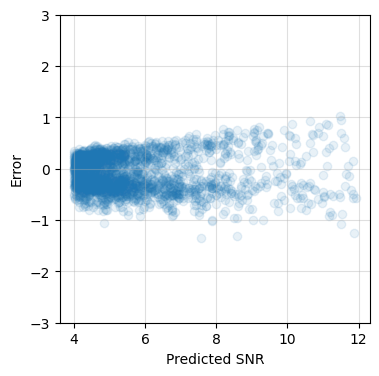

In [26]:
# looking correlation between error and snr
import matplotlib.pyplot as plt
y_pred_ = snr_ann
y_test = snr_bilby
idx = (y_pred_>4) & (y_pred_<12)
plt.figure(figsize=(4,4))
plt.scatter(y_pred_[idx], y_test[idx]-y_pred_[idx], alpha=0.1)
plt.xlabel("Predicted SNR")
#plt.xscale("log")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.ylim(-3,3)
#plt.savefig("error_vs_snr.png")
plt.show()

* This is reason why I consider the error margin of 2.5 for the snr recalculation.

## Comparision of rates

### Inner product snr

In [29]:
# ./ler_data/unlensed_events_inner_product.json
ler.unlensed_rate(
    unlensed_param='unlensed_events_inner_product.json',
    snr_threshold=8,
);

getting unlensed_params from json file ./ler_data/unlensed_events_inner_product.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 337.48464282479057
number of simulated unlensed detectable events: 326
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


### ANN snr

In [36]:
from ler.utils import get_param_from_json

unlensed_params_ann = get_param_from_json('./ler_data/unlensed_events_inner_product.json')

In [37]:
# replace the optimal snr with the ann snr
unlensed_params_ann['snr_net'] = gwsnr.snr(gw_param_dict=unlensed_params_ann)['snr_net']

In [39]:
ler.unlensed_rate(
    unlensed_param=unlensed_params_ann,
    snr_threshold=8,
);

using provided unlensed_param dict...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 342.66078765339165
number of simulated unlensed detectable events: 331
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


* there is a samll difference between the two methods, but the difference is samll. If increase the number of simulations, the difference will be smaller.

### With SNR recalculation

In [41]:
ler.unlensed_rate(
    unlensed_param=unlensed_params_ann,
    snr_threshold=8,
    snr_recalculation=True,
    snr_threshold_recalculation=5.5,
);

using provided unlensed_param dict...


100%|████████████████████████████████████████████████████████████| 929/929 [00:04<00:00, 191.19it/s]

given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 337.48464282479057
number of simulated unlensed detectable events: 326
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


* As you can see, there is no difference as compared to the inner product method.

## Time consumption test in lensed rate calculation

In [1]:
from ler.rates import LeR
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
ler = LeR(npool=6,
            verbose=False,
            snr_type='inner_product',
            waveform_approximant='IMRPhenomXPHM',
            ifos = ['L1', 'H1', 'V1'],
                )

### Inner product snr

In [7]:
# calculate the rate with time
start = time.time()
ler.selecting_n_lensed_detectable_events(
    size = 500,
    batch_size=25000,
    snr_threshold=[8.0,8.0],
    num_img=[1,1],
    resume=False,
    output_jsonfile='n_lensed_detectable_events_inner_product.json',
    meta_data_file='meta_lensed_inner_product.json',
    trim_to_size=False,
    #snr_recalculation=True,
    #snr_threshold_recalculation=[6.0,6.0],
);
end = time.time()
print(f"\nElapsed time: {end-start} s")

collected number of detectable events =  0


100%|██████████████████████████████████████████████████████████| 2307/2307 [00:05<00:00, 460.80it/s]


collected number of events =  108
total number of events =  25000
total lensed rate (yr^-1): 1.0734600721427827


100%|██████████████████████████████████████████████████████████| 2389/2389 [00:05<00:00, 466.32it/s]


collected number of events =  222
total number of events =  50000
total lensed rate (yr^-1): 1.1032784074800823


100%|██████████████████████████████████████████████████████████| 2371/2371 [00:05<00:00, 472.36it/s]


collected number of events =  340
total number of events =  75000
total lensed rate (yr^-1): 1.1264704460757595


100%|██████████████████████████████████████████████████████████| 2406/2406 [00:05<00:00, 474.48it/s]


collected number of events =  468
total number of events =  100000
total lensed rate (yr^-1): 1.1629150781546813


100%|██████████████████████████████████████████████████████████| 2381/2381 [00:05<00:00, 475.83it/s]


collected number of events =  575
total number of events =  125000
total lensed rate (yr^-1): 1.143036187929815
storing detectable lensed params in ./ler_data/n_lensed_detectable_events_inner_product.json

Elapsed time:  366.90850710868835


### ANN SNR

In [2]:
ler = LeR(npool=6,
            verbose=False,
            snr_type='ann',
            waveform_approximant='IMRPhenomXPHM',
            ifos = ['L1', 'H1', 'V1'],
                )

# calculate the rate with time
start = time.time()
ler.selecting_n_lensed_detectable_events(
    size = 500,
    batch_size=25000,
    snr_threshold=[8.0,8.0],
    num_img=[1,1],
    resume=False,
    output_jsonfile='n_lensed_detectable_events_ann.json',
    meta_data_file='meta_unlensed_ann.json',
    trim_to_size=False,
    #snr_recalculation=True,
    #snr_threshold_recalculation=[5.5,5.5],
);
end = time.time()
print(f"\nElapsed time: {end-start} s")

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.66s/it]


collected number of events =  132
total number of events =  25000
total lensed rate (yr^-1): 1.3120067548411791


100%|███████████████████████████████████████████████████████| 25000/25000 [00:09<00:00, 2565.61it/s]


collected number of events =  268
total number of events =  50000
total lensed rate (yr^-1): 1.3318856450660455


100%|███████████████████████████████████████████████████████| 25000/25000 [00:09<00:00, 2776.54it/s]


collected number of events =  394
total number of events =  75000
total lensed rate (yr^-1): 1.305380458099557


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 3015.70it/s]


collected number of events =  523
total number of events =  100000
total lensed rate (yr^-1): 1.2995824484506375
storing detectable lensed params in ./ler_data/n_lensed_detectable_events_ann.json

Elapsed time: 69.95586466789246 s


### ANN with SNR recalculation

In [3]:
ler = LeR(npool=6,
            verbose=False,
            snr_type='ann',
            waveform_approximant='IMRPhenomXPHM',
            ifos = ['L1', 'H1', 'V1'],
                )

In [4]:
# calculate the rate with time
start = time.time()
ler.selecting_n_lensed_detectable_events(
    size = 500,
    batch_size=25000,
    snr_threshold=[8.0,8.0],
    num_img=[1,1],
    resume=False,
    output_jsonfile='n_lensed_detectable_events_snr_recalculation.json',
    meta_data_file='meta_unlensed_snr_recalculation.json',
    trim_to_size=False,
    snr_recalculation=True,
    snr_threshold_recalculation=[5.5,5.5],
);
end = time.time()
print(f"\nElapsed time: {end-start} s")

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.71s/it]


calculating snrs...


100%|█████████████████████████████████████████████████████████████| 233/233 [00:02<00:00, 79.14it/s]


collected number of events =  108
total number of events =  353
total lensed rate (yr^-1): 76.02408442937555


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2889.26it/s]


calculating snrs...


100%|█████████████████████████████████████████████████████████████| 231/231 [00:02<00:00, 80.57it/s]


collected number of events =  221
total number of events =  716
total lensed rate (yr^-1): 76.69753386339843


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2844.83it/s]


calculating snrs...


100%|█████████████████████████████████████████████████████████████| 211/211 [00:02<00:00, 72.39it/s]


collected number of events =  333
total number of events =  1037
total lensed rate (yr^-1): 79.79352030955272


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.73s/it]


calculating snrs...


100%|█████████████████████████████████████████████████████████████| 234/234 [00:02<00:00, 78.22it/s]


collected number of events =  448
total number of events =  1403
total lensed rate (yr^-1): 79.34553475356489


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.64s/it]


calculating snrs...


100%|█████████████████████████████████████████████████████████████| 237/237 [00:03<00:00, 68.05it/s]


collected number of events =  547
total number of events =  1761
total lensed rate (yr^-1): 77.18450420926953
storing detectable lensed params in ./ler_data/n_lensed_detectable_events_ann.json

Elapsed time: 153.31893301010132 s
